In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.stats import skew, kurtosis

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [53]:
# Load the dataset
df = pd.read_csv("Crop_recommendation.csv")  

In [4]:
# Display basic info
print("\nData Preview:\n", df.head())


Data Preview:
     N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [5]:
# Describe the shape of dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (2200, 8)


In [6]:
# Describe the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
# Describe the columns
print("\nDataset Columns:")
print(df.columns)


Dataset Columns:
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [8]:
# Describe the data types
print("\nData Types:")
print(df.dtypes)


Data Types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [9]:
# Summary statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


In [10]:
# Mode for categorical columns
print("\nMode for Categorical Columns:")
print(df['label'].mode())


Mode for Categorical Columns:
0           apple
1          banana
2       blackgram
3        chickpea
4         coconut
5          coffee
6          cotton
7          grapes
8            jute
9     kidneybeans
10         lentil
11          maize
12          mango
13      mothbeans
14       mungbean
15      muskmelon
16         orange
17         papaya
18     pigeonpeas
19    pomegranate
20           rice
21     watermelon
Name: label, dtype: object


In [11]:
# Distribution of the target variable (crop types)
print("\nDistribution of Crop Types:")
print(df['label'].value_counts())


Distribution of Crop Types:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [12]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [13]:
# Check for duplicates
print("\nNumber of Duplicates:")
print(df.duplicated().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()


Number of Duplicates:
0


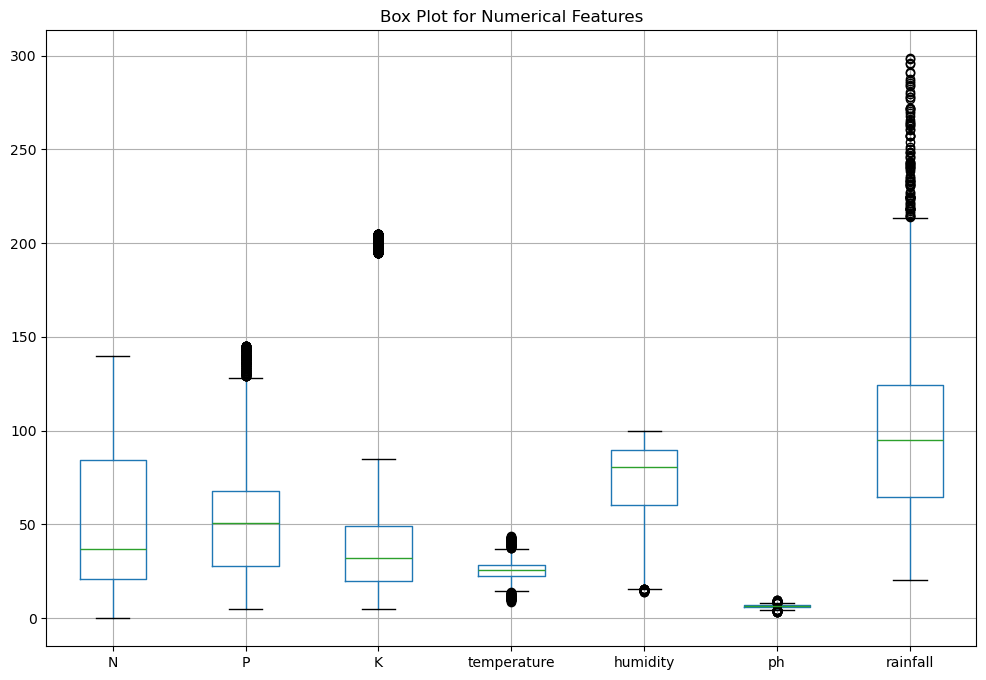

In [14]:
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
df.boxplot(column=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
plt.title('Box Plot for Numerical Features')
plt.show()

In [15]:
import numpy as np
import pandas as pd

# Function to cap outliers using IQR
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Function to cap outliers using Z-score (for normally distributed features)
def cap_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Columns to check for outliers
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Apply IQR method for skewed data
df = cap_outliers_iqr(df, numerical_features)

# Apply Z-score method for normally distributed features 
normal_dist_features = ['temperature', 'ph']
df = cap_outliers_zscore(df, normal_dist_features)

print("Outliers capped successfully!")


Outliers capped successfully!


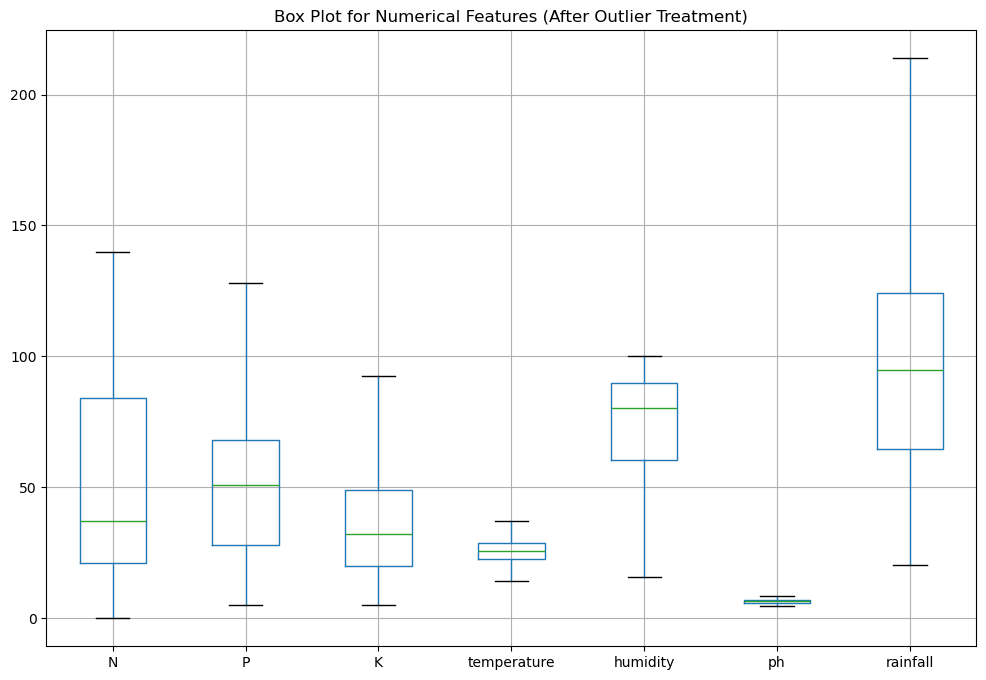

In [16]:
# Replot the box plot after outlier treatment
plt.figure(figsize=(12, 8))
df.boxplot(column=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
plt.title('Box Plot for Numerical Features (After Outlier Treatment)')
plt.show()

In [17]:
# Separate features (X) and target (y)
X = df.drop(columns=["label"])  #Features
y = df["label"] #Target

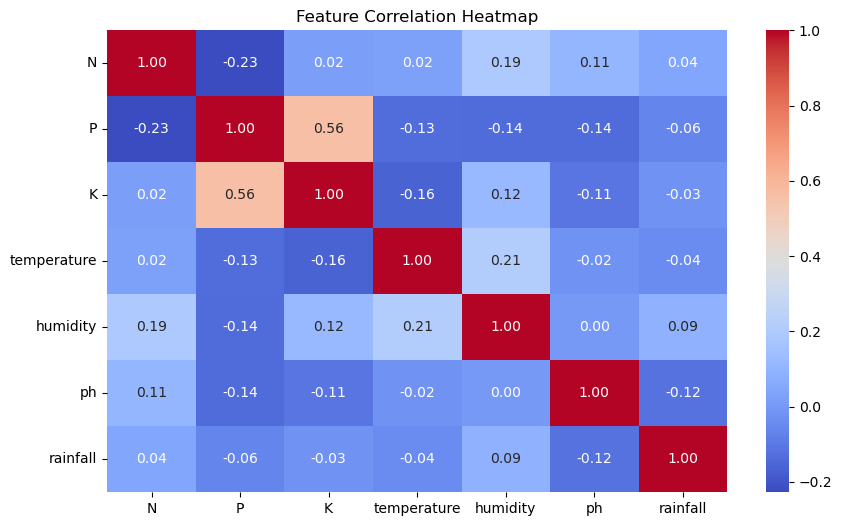

In [18]:
# Step 1: Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
# Step 2: Remove Highly Correlated Features (Threshold: 0.85)
correlation_matrix = X.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
print("Highly Correlated Features to Remove:", high_corr_features)

X_filtered = X.drop(columns=high_corr_features)  # Drop correlated features

Highly Correlated Features to Remove: []


In [20]:
# Step 3: Feature Scaling
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X_filtered)
X_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns)

In [21]:
# Step 4: PCA (Only if Features > 5)
if X_scaled.shape[1] > 5:  
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X_scaled)
    print("PCA applied. New shape:", X_pca.shape)
else:
    X_pca = X_scaled  # Keep original features if <5

print("Final Feature Set Shape:", X_pca.shape)

PCA applied. New shape: (2200, 5)
Final Feature Set Shape: (2200, 5)


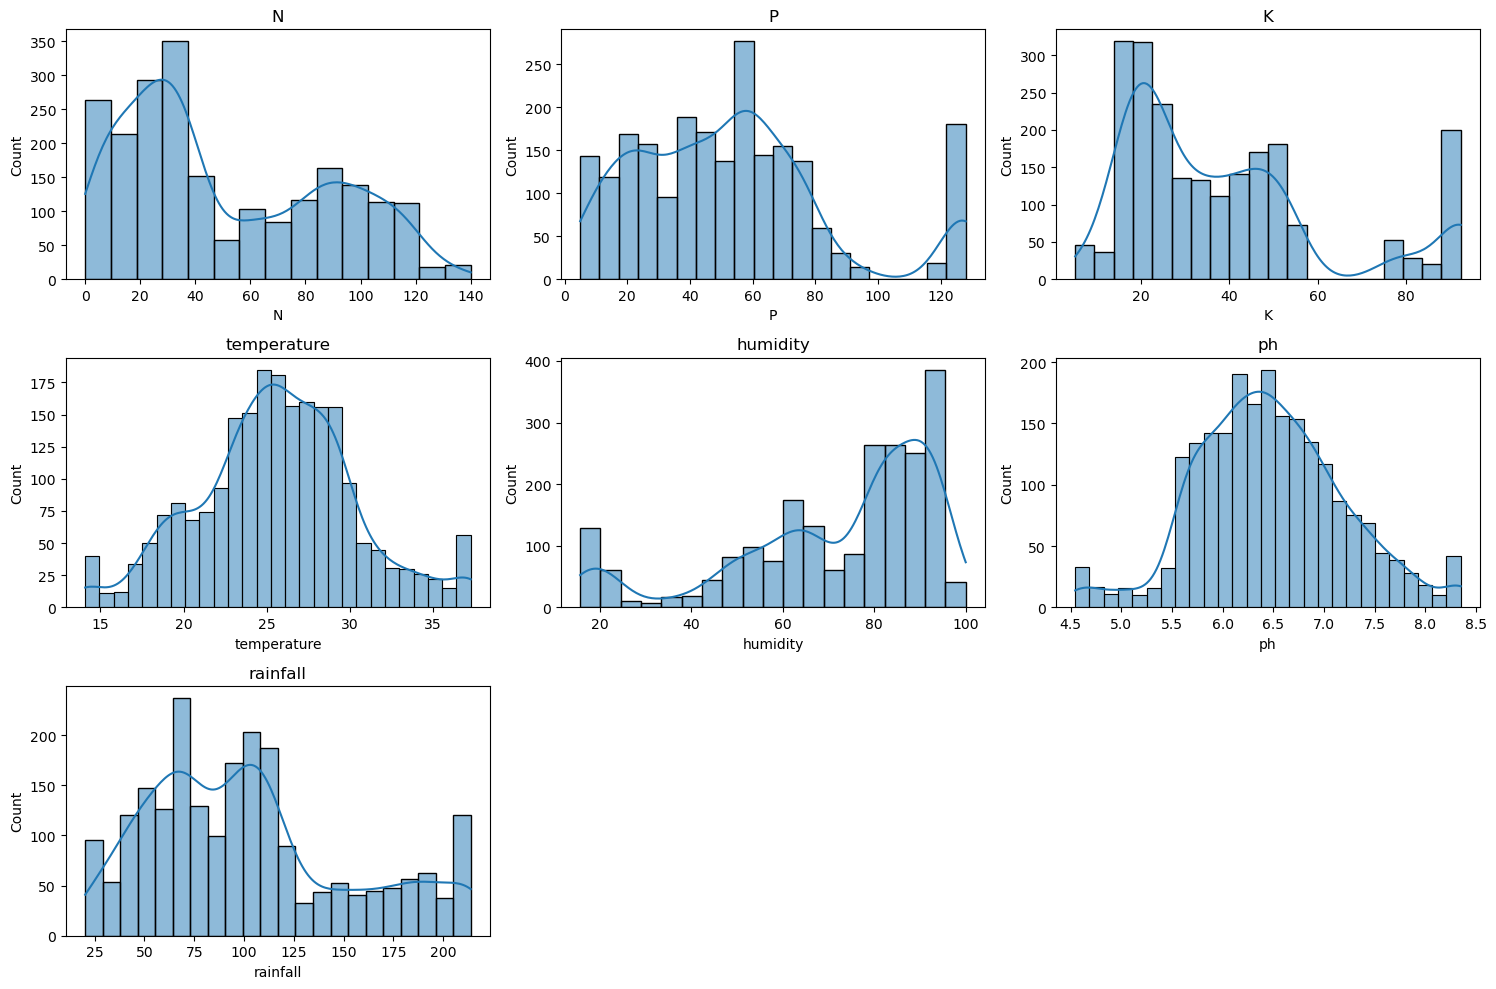

In [23]:
#EDA
# Univariate Analysis: Distribution of numerical features

#Histogram

plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

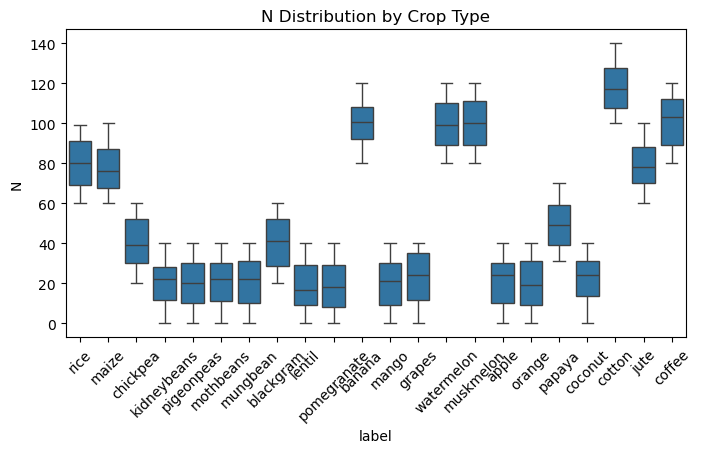

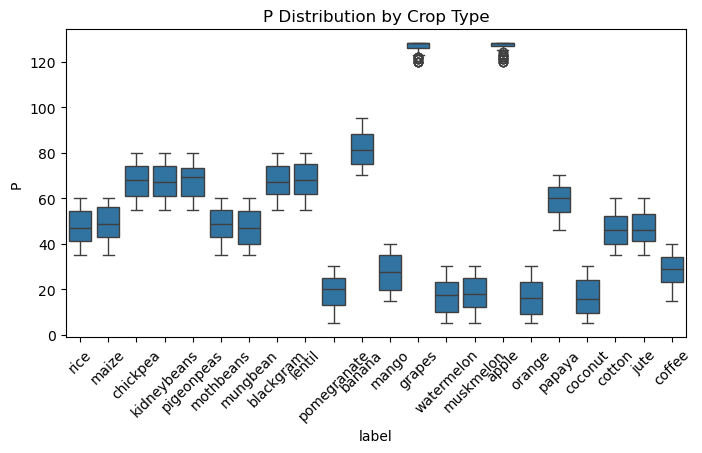

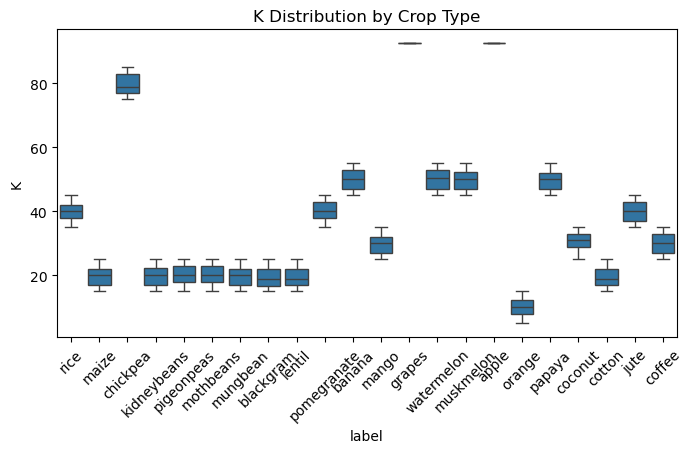

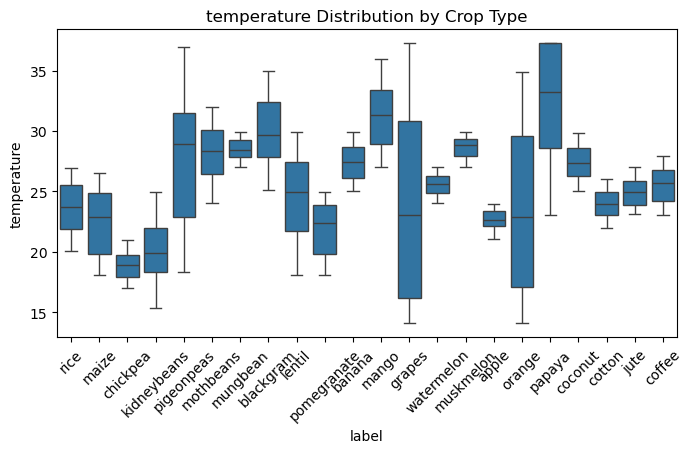

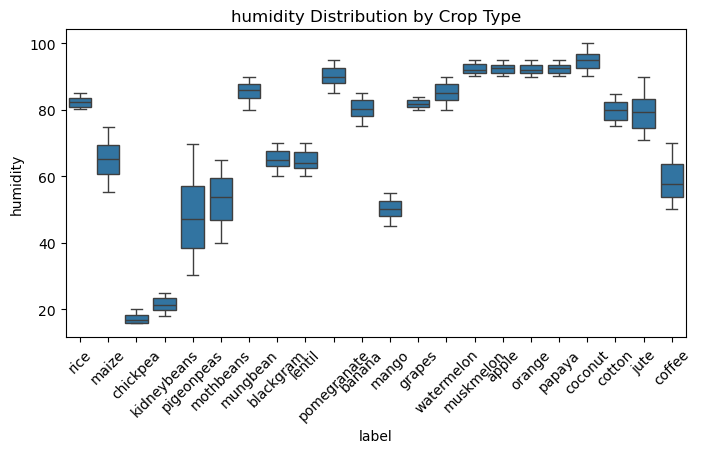

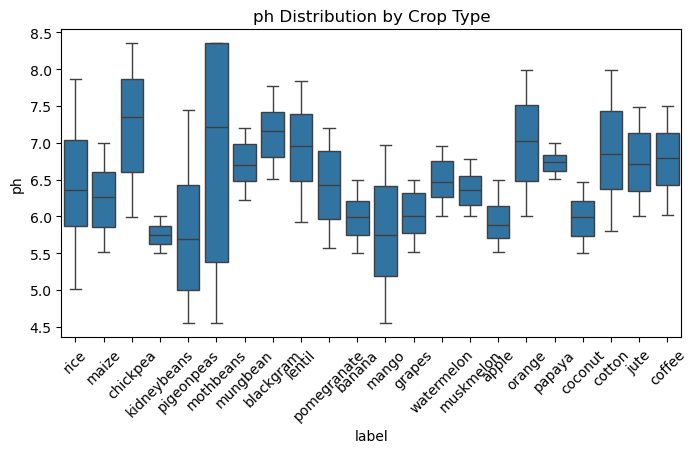

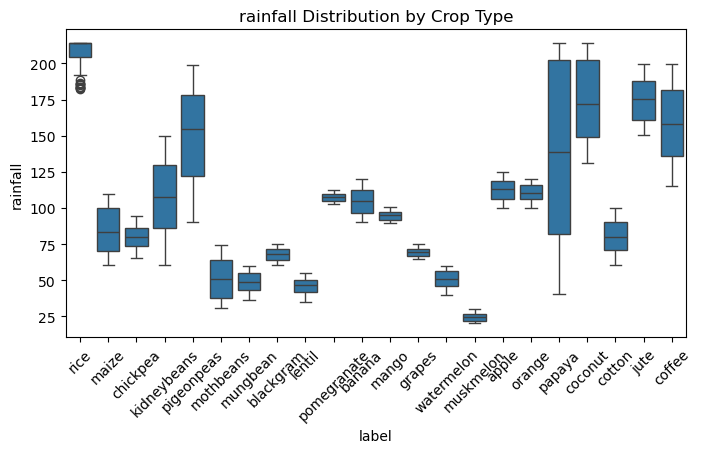

In [39]:
# Boxplots of features grouped by crop
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='label', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16088\1955150758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, order=df['label'].value_counts().index, palette='viridis')


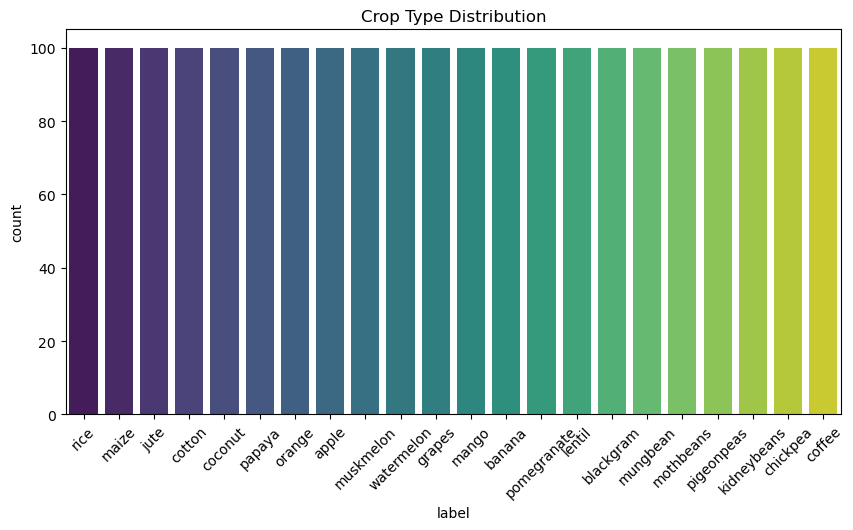

In [41]:
#Bar graph
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df, order=df['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Crop Type Distribution')
plt.show()

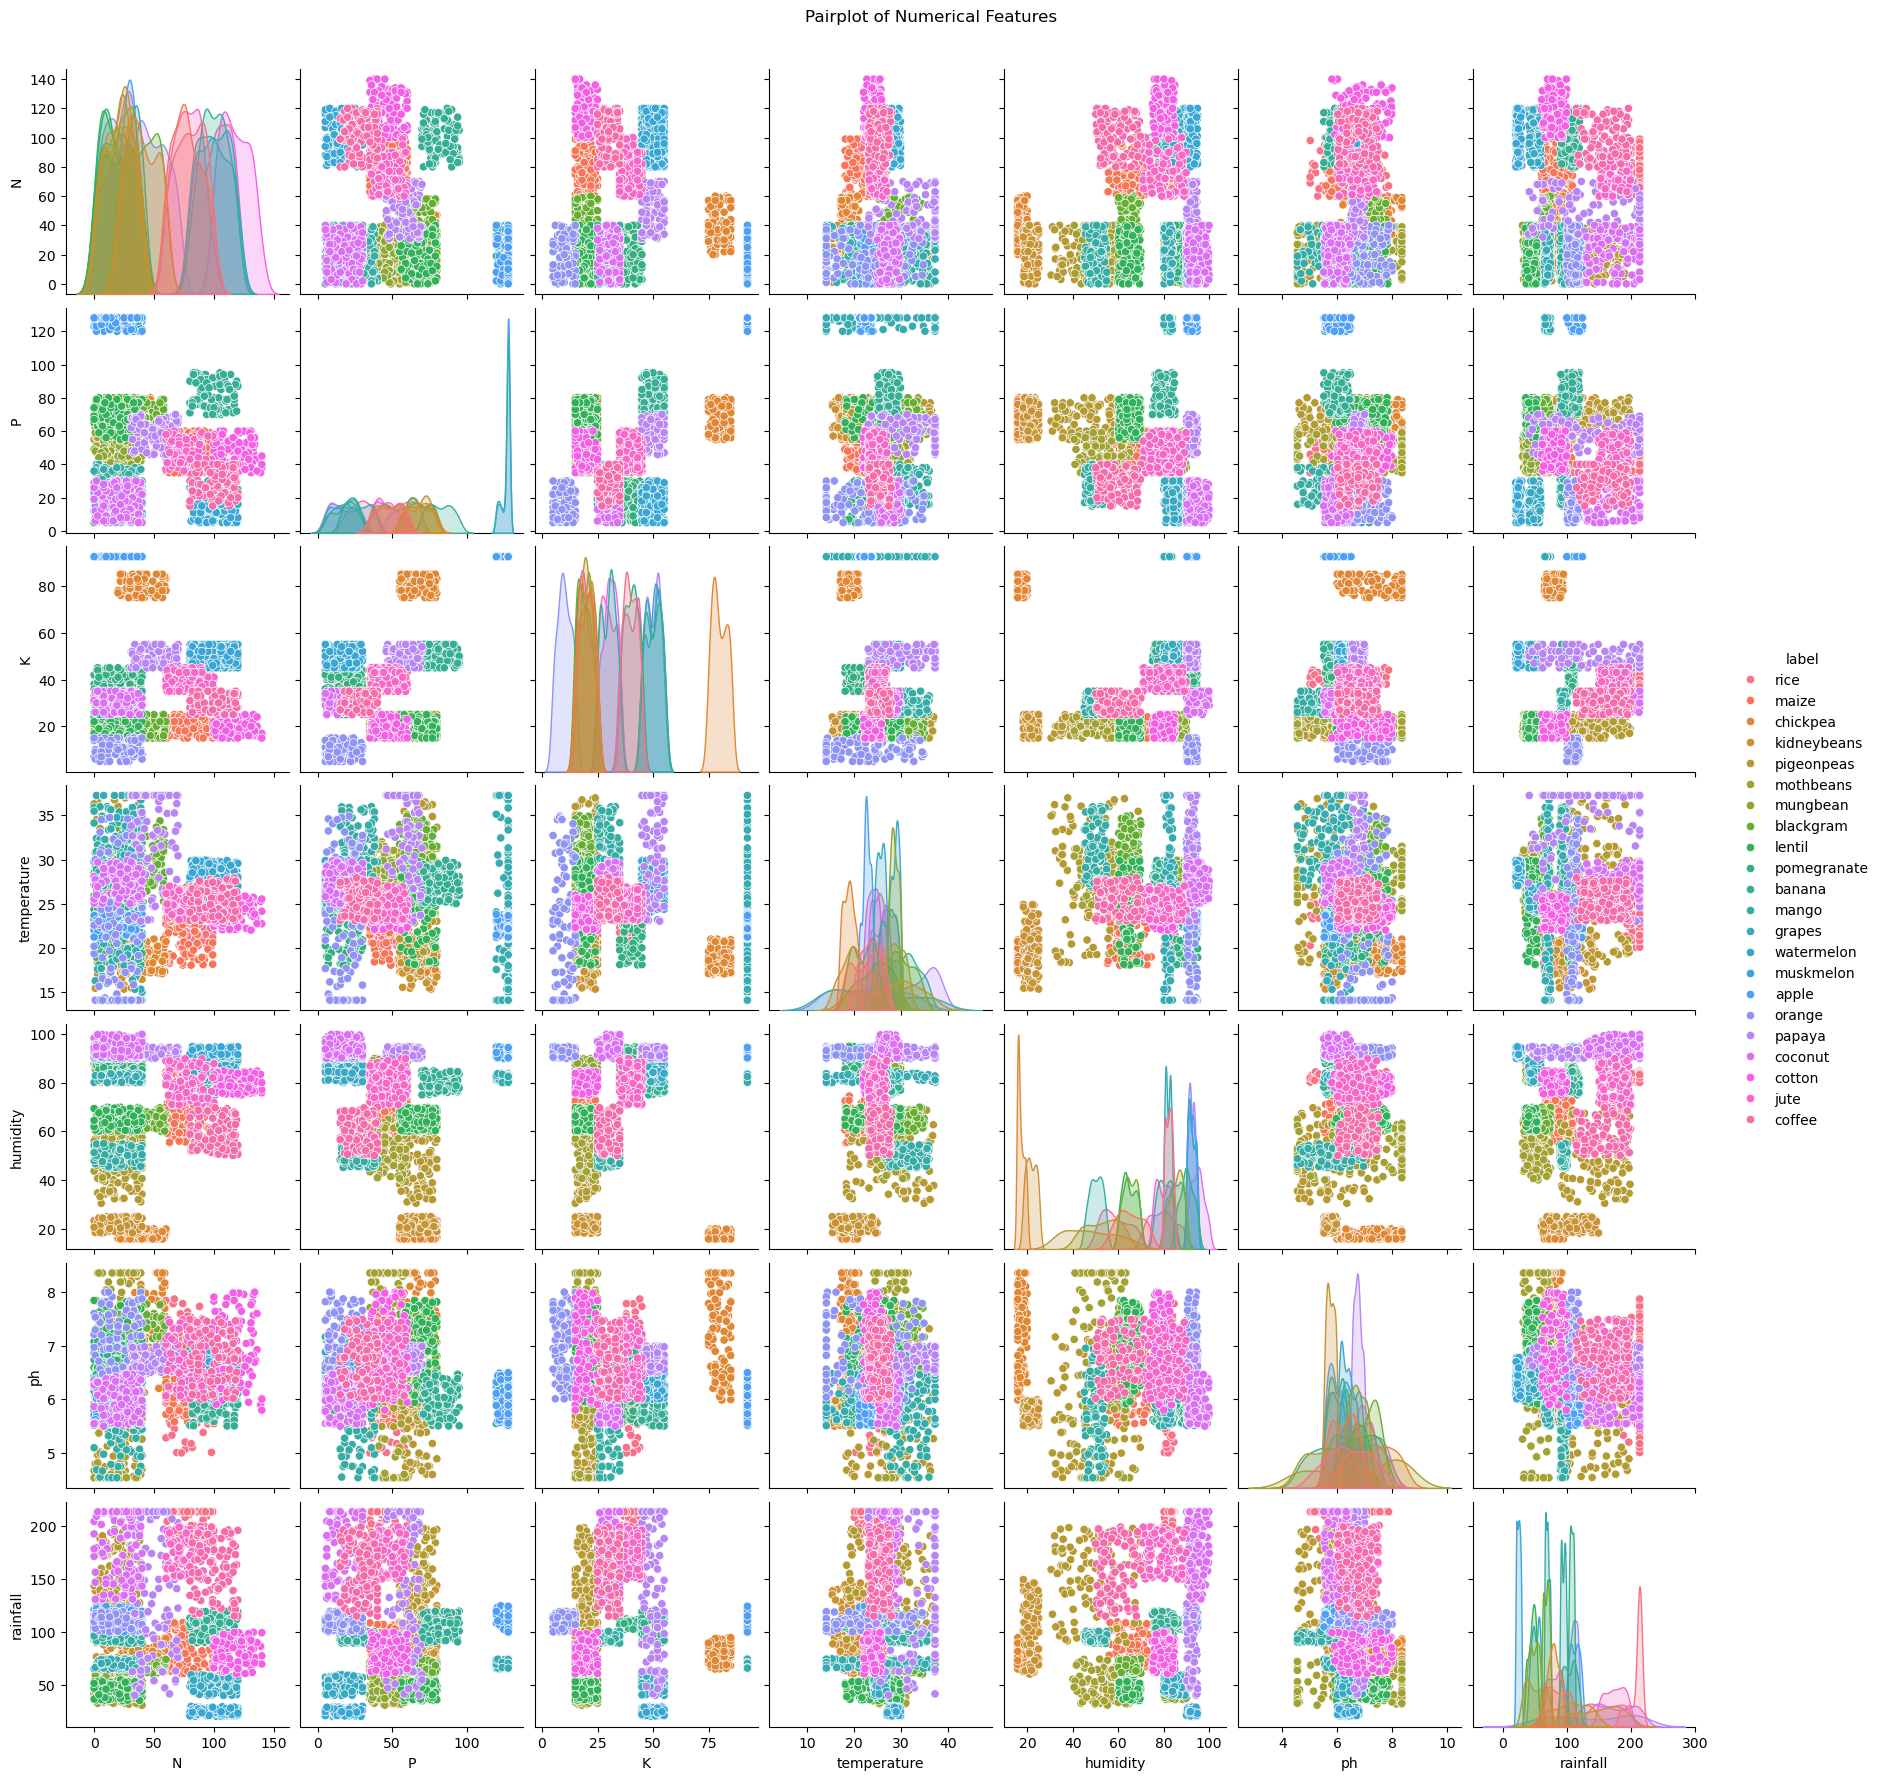

In [36]:
#pairplot for all numerical features
sns.pairplot(df,hue='label')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

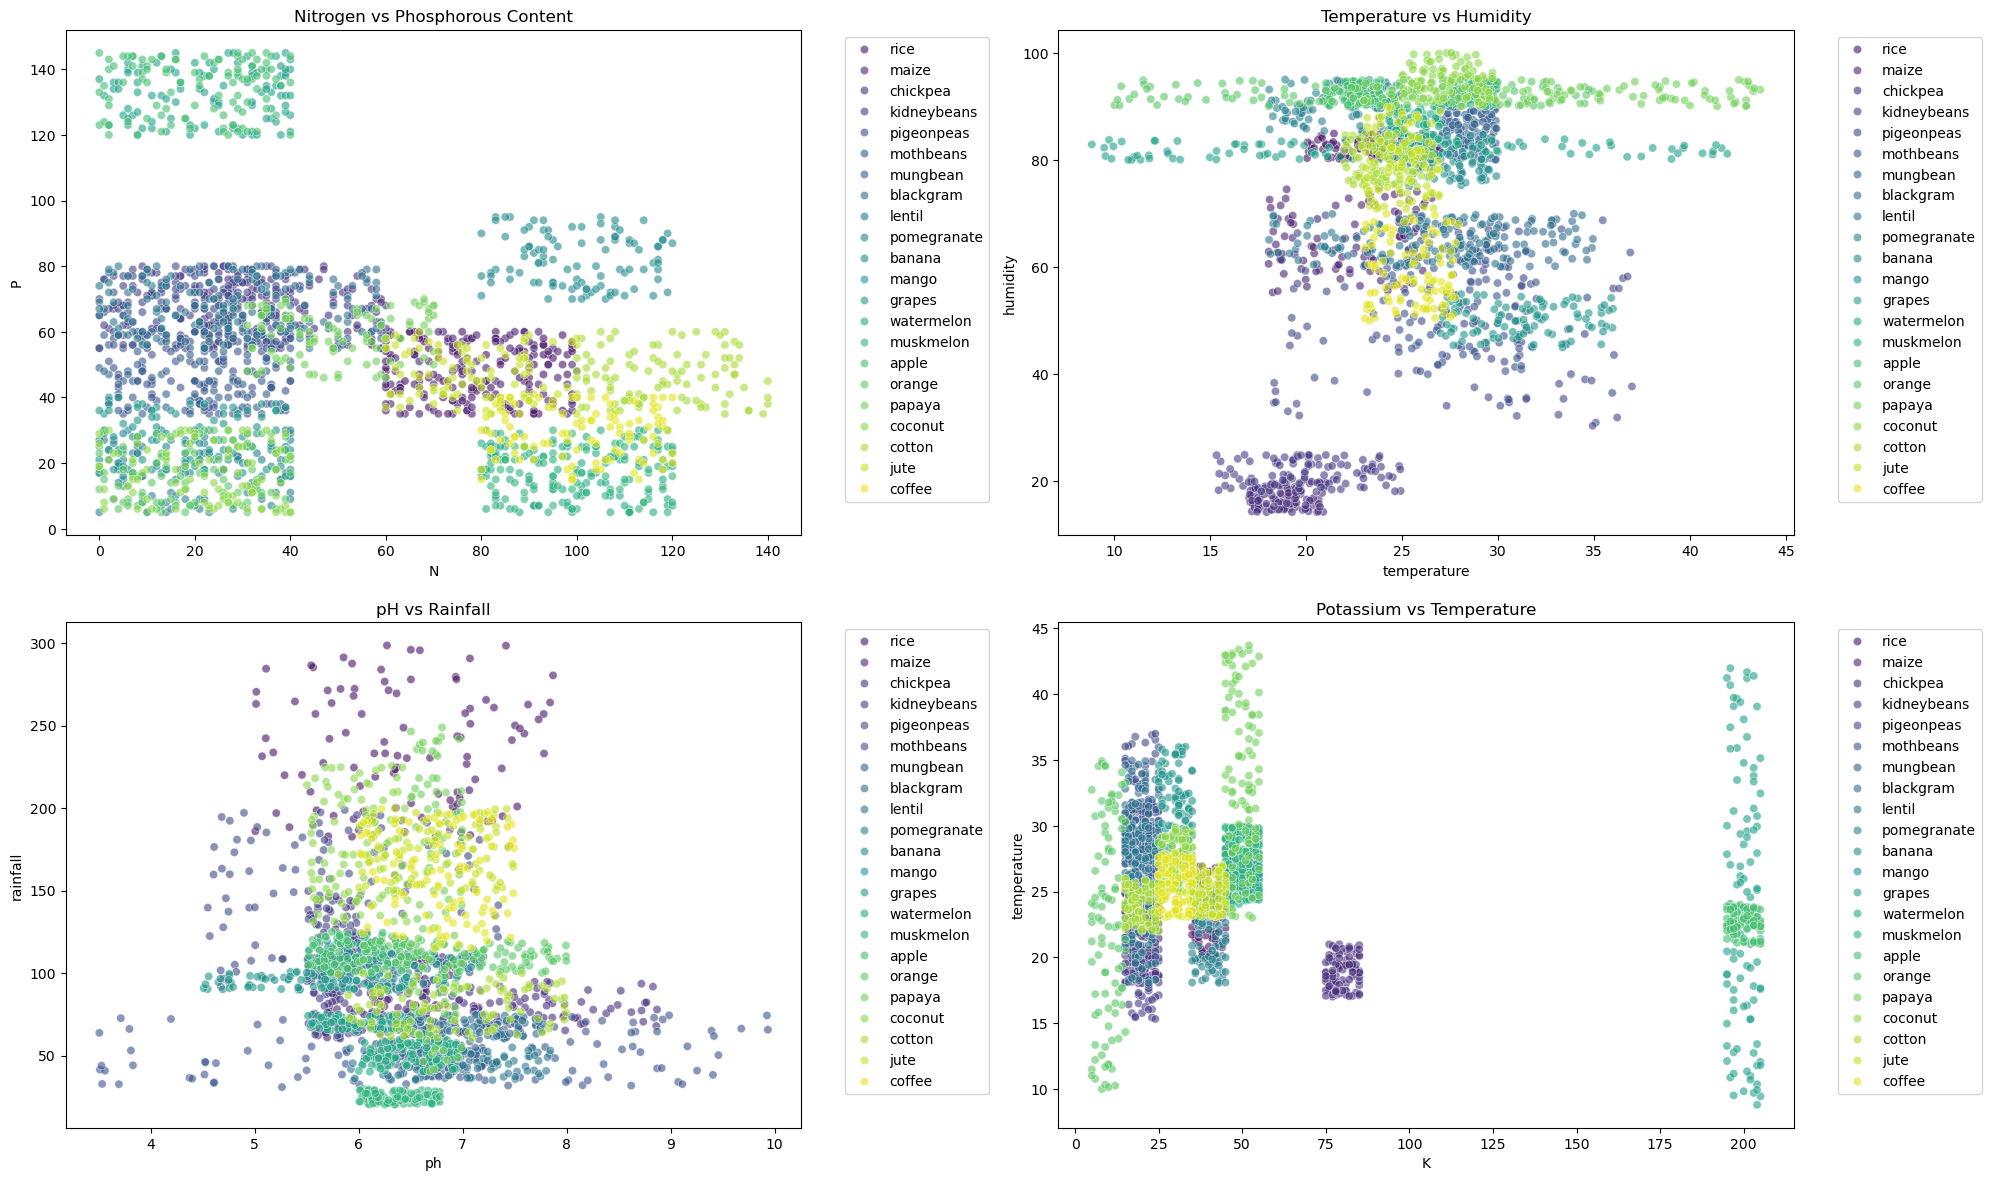

In [96]:
#Scatterplot of Feature Rekationships

plt.figure(figsize=(20, 12))

# N vs P
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='N', y='P', hue='label', palette='viridis', alpha=0.6)
plt.title('Nitrogen vs Phosphorous Content')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Temperature vs Humidity
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', palette='viridis', alpha=0.6)
plt.title('Temperature vs Humidity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# pH vs Rainfall
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='ph', y='rainfall', hue='label', palette='viridis', alpha=0.6)
plt.title('pH vs Rainfall')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# K vs Temperature
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='K', y='temperature', hue='label', palette='viridis', alpha=0.6)
plt.title('Potassium vs Temperature')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

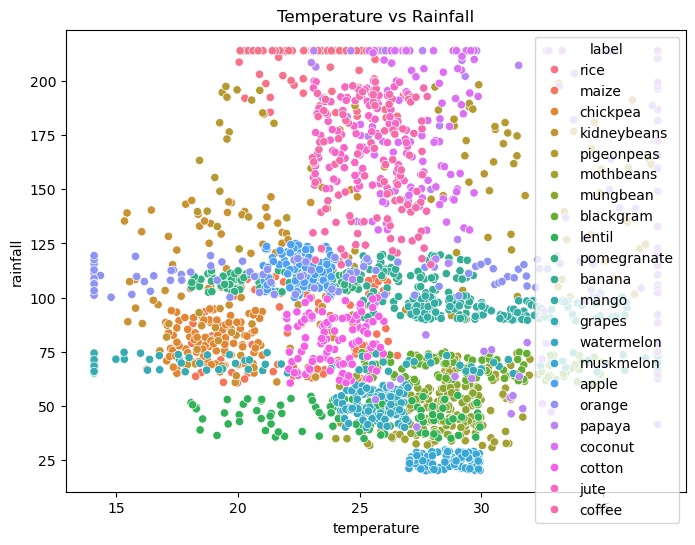

In [33]:
# Scatter plot for temperature vs rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature', y='rainfall', data=df, hue='label')
plt.title('Temperature vs Rainfall')
plt.show()

                  N       P      K  temperature   humidity        ph  \
label                                                                  
apple         20.80  126.66  92.50    22.630942  92.333383  5.929663   
banana       100.23   82.01  50.05    27.376798  80.358123  5.983893   
blackgram     40.02   67.47  19.24    29.973340  65.118426  7.133952   
chickpea      40.09   67.79  79.92    18.872847  17.114928  7.295763   
coconut       21.98   16.93  30.59    27.409892  94.844272  5.976562   
coffee       101.20   28.74  29.94    25.540477  58.869846  6.790308   
cotton       117.77   46.24  19.56    23.988958  79.843474  6.912675   
grapes        23.18  126.46  92.50    24.084137  81.875228  6.025937   
jute          78.40   46.86  39.99    24.958376  79.639864  6.732778   
kidneybeans   20.75   67.54  20.05    20.115085  21.605357  5.749411   
lentil        18.77   68.36  19.41    24.509052  64.804785  6.927932   
maize         77.76   48.44  19.79    22.389204  65.092249  6.24

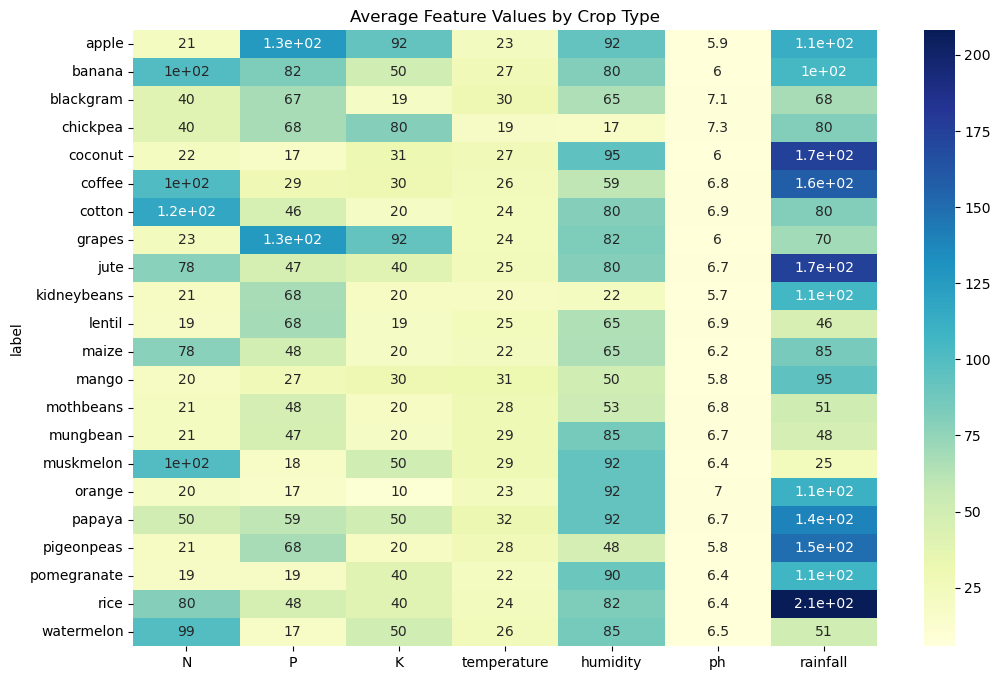

In [44]:
#. Group By Crop Type and Calculate Mean:
crop_mean = df.groupby('label').mean()
print(crop_mean)

plt.figure(figsize=(12, 8))
sns.heatmap(crop_mean, annot=True, cmap='YlGnBu')
plt.title('Average Feature Values by Crop Type')
plt.show()

In [49]:
# 1. Descriptive Statistics (Only for numeric columns)
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

#Mean, median, variance, and std for numeric columns
desc_stats = numeric_df.describe().T  # T transposes the output for easier viewing
desc_stats['variance'] = numeric_df.var()
desc_stats['median'] = numeric_df.median()

print("\nDescriptive Statistics (Mean, Median, Variance, Standard Deviation):")
print(desc_stats[['mean', 'median', 'variance', 'std']])


Descriptive Statistics (Mean, Median, Variance, Standard Deviation):
                   mean     median     variance        std
N             50.551818  37.000000  1362.889537  36.917334
P             52.743182  51.000000   987.666165  31.427156
K             38.376364  32.000000   550.386708  23.460322
temperature   25.588740  25.598693    22.456265   4.738804
humidity      71.493347  80.473146   494.374585  22.234536
ph             6.464205   6.425045     0.533321   0.730288
rainfall     101.986465  94.867624  2617.933258  51.165743


In [91]:
#Mode

# For numerical columns
mode_numerical = df.mode(numeric_only=True).iloc[0]  # Mode for numerical columns
print("Mode for numerical columns:\n", mode_numerical)

# For categorical columns
mode_categorical = df.mode().iloc[0]  # Mode for categorical columns
print("\nMode for categorical columns:\n", mode_categorical)

Mode for numerical columns:
 N              22.000000
P              60.000000
K              17.000000
temperature     8.825675
humidity       14.258040
ph              3.504752
rainfall       20.211267
Name: 0, dtype: float64

Mode for categorical columns:
 N                   22.0
P                   60.0
K                   17.0
temperature     8.825675
humidity        14.25804
ph              3.504752
rainfall       20.211267
label              apple
Name: 0, dtype: object


In [50]:
# 2. Skewness and Kurtosis (Only for numeric columns)
print("\nSkewness and Kurtosis for each feature:")
for col in numeric_df.columns:
    skew_val = skew(numeric_df[col])
    kurt_val = kurtosis(numeric_df[col])
    print(f"{col} - Skewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}")


Skewness and Kurtosis for each feature:
N - Skewness: 0.51, Kurtosis: -1.06
P - Skewness: 0.84, Kurtosis: 0.40
K - Skewness: 1.12, Kurtosis: 0.33
temperature - Skewness: 0.07, Kurtosis: 0.11
humidity - Skewness: -1.09, Kurtosis: 0.28
ph - Skewness: 0.15, Kurtosis: 0.23
rainfall - Skewness: 0.66, Kurtosis: -0.41


In [80]:
# Model Development

# Function to evaluate models

def evaluate_model(y_true, y_pred, y_prob, model_name):
    print(f"Evaluation for {model_name}:")
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Precision (Weighted average)
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    
    # Recall (Weighted average)
    recall = recall_score(y_true, y_pred, average='weighted')
    print(f"Recall: {recall:.4f}")
    
    # F1-Score (Weighted average)
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"F1-Score: {f1:.4f}")
    
    # Classification Report (provides precision, recall, f1-score for each class)
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    # Confusion Matrix
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    
    # ROC-AUC (For binary or multi-class classification)
    try:
        # Check if y_true is a pandas Series or numpy array, and handle it accordingly
        if isinstance(y_true, pd.Series):
            unique_classes = y_true.unique()
        else:
            unique_classes = np.unique(y_true)
        
        if len(unique_classes) == 2:  # Binary classification
            roc_auc = roc_auc_score(y_true, y_prob[:, 1])  # For binary, use the probabilities for the positive class
        else:  # Multi-class classification
            roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr', average='weighted')
        
        print(f"ROC-AUC: {roc_auc:.4f}")
        
        # Plot ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1]) if len(unique_classes) == 2 else roc_curve(y_true, y_prob, multi_class='ovr')
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc='best')
        plt.show()
        
    except Exception as e:
        print("Error in ROC-AUC calculation:", str(e))

    print("\n")



In [60]:
# Encode the target variable y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [97]:
# Train-Test-Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}\n")

X_train shape: (1760, 7)
X_test shape: (440, 7)



In [100]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(
    penalty='l2',           # Regularization type (default is 'l2')
    C=1.0,                  # Inverse of regularization strength (default is 1.0)
    solver='lbfgs',         # Optimization algorithm
    max_iter=1000,          # Increase if the model doesn't converge
    random_state=42         # For reproducibility
)

# Fit the model
lr_model.fit(X_train, y_train)

C:\Users\Asus\anaconda3\New folder\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [104]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95227
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        20
           1      1.000     1.000     1.000        20
           2      0.682     0.750     0.714        20
           3      1.000     1.000     1.000        20
           4      1.000     1.000     1.000        20
           5      1.000     1.000     1.000        20
           6      0.800     1.000     0.889        20
           7      1.000     1.000     1.000        20
           8      0.909     1.000     0.952        20
           9      1.000     1.000     1.000        20
          10      0.944     0.850     0.895        20
          11      0.882     0.750     0.811        20
          12      1.000     1.000     1.000        20
          13      0.789     0.750     0.769        20
          14      1.000     1.000     1.000        20
          15      1.000     1.000     1.000        20
          16      1.000     1.000     1.

In [62]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [87]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Make predictions
y_pred_rf = rf_model.predict(X_test)  # Predicted labels
y_prob_rf = rf_model.predict_proba(X_test)  # Predicted probabilities

In [88]:
# Evaluate the Random Forest model using the evaluate_model function
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

Evaluation for Random Forest:
Accuracy: 0.9955
Precision: 0.9957
Recall: 0.9955
F1-Score: 0.9955

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.95      1.00      0.98        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       0.95      1.00      0.98        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15 

In [90]:
#SVM

# Train SVM
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Make predictions and probabilities
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)

# Evaluate the SVM model
evaluate_model(y_test, y_pred_svm, y_prob_svm, "SVM")


Evaluation for SVM:
Accuracy: 0.9886
Precision: 0.9896
Recall: 0.9886
F1-Score: 0.9886

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       0.91      1.00      0.95        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      0.90      0.95        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00

In [83]:
#Train XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Make predictions and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)

# Evaluate the XGBoost model
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")


Evaluation for XGBoost:
Accuracy: 0.9864
Precision: 0.9874
Recall: 0.9864
F1-Score: 0.9862

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      0.85      0.92        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.95      1.00      0.98        20
          14       0.91      1.00      0.95        20
          15       

In [105]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

In [106]:
# Stratified K-Fold Cross-Validation (k=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [107]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y_encoded, cv=skfold, scoring="accuracy")
print("Random Forest CV Accuracy (k=5):", np.mean(rf_cv_scores))

Random Forest CV Accuracy (k=5): 0.9959090909090909


In [108]:
# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X, y_encoded, cv=skfold, scoring="accuracy")
print("SVM CV Accuracy (k=5):", np.mean(svm_cv_scores))

SVM CV Accuracy (k=5): 0.9786363636363635


In [109]:
# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y_encoded, cv=skfold, scoring="accuracy")
print("XGBoost CV Accuracy (k=5):", np.mean(xgb_cv_scores))

XGBoost CV Accuracy (k=5): 0.9927272727272728
